In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('./global_logs_with_error.csv')

In [13]:
df.head()

,Unnamed: 0,gps_e,gps_n,pf_e,pf_n,pf_theta,diff_e,diff_n,diff_sum,error
0,0,743073.622550,3.398155e+06,742838.956859,3.399120e+06,0.905491,55067.986511,930414.637359,985482.623871,992.714775
1,1,743085.612945,3.398168e+06,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2,2,743097.596624,3.398181e+06,742835.340628,3.399117e+06,0.703794,68778.207052,876303.339582,945081.546634,972.153047
3,3,743109.593652,3.398193e+06,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
4,4,743119.546558,3.398205e+06,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


In [14]:
df2 = df.dropna()
errors = df2.error
errors

0      992.714775
2      972.153047
5      496.473415
6      512.876932
8       13.225859
11      10.070367
12       9.223869
14       9.540906
15       8.093062
17       9.426685
18      10.181036
20      10.624977
21      11.041357
24      11.819329
27      12.407885
30      11.830670
33      11.930407
36      13.821807
39      11.523078
42       6.615996
45       3.883868
48       6.976421
49       7.255883
51       8.077390
52       6.424924
54       8.307939
57       8.115700
58       8.534672
60       8.988315
63       9.334488
64      10.082301
66      10.721680
67      11.113809
70      12.732156
73      11.246118
76      13.425536
79      14.255342
82      13.911363
85      14.799188
88      15.706222
89      15.197639
91      15.972589
96      15.158487
99      15.145239
102     16.229669
115      3.862529
118      4.210600
Name: error, dtype: float64

<AxesSubplot:>

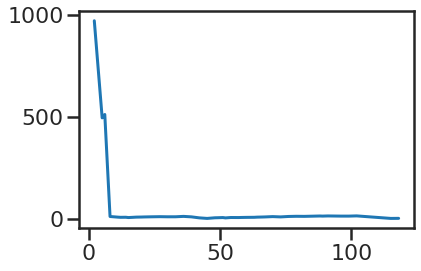

In [15]:
errors[1:].plot()

In [16]:
errors[12:].mean()

10.876017016931053

<AxesSubplot:>

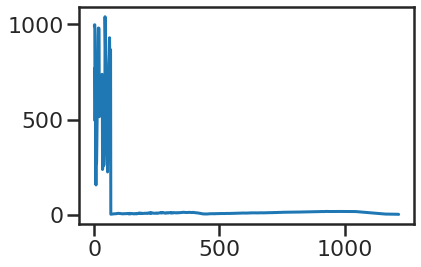

In [35]:
df_global = pd.read_csv('high_freq_global_callogs_with_error.csv')
df_global.dropna(inplace=True)
df_global.error.plot()

In [36]:
df_global.error[100:].mean()

10.101024730959413

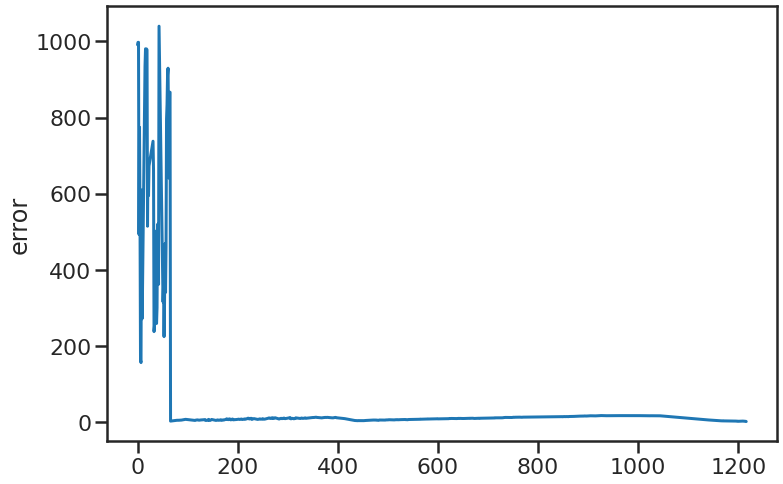

In [37]:
import seaborn as sns
plt.figure(figsize=(12,8))
# sns.set_theme(
sns.set_style('ticks')
sns.set_context("poster")
# sns.axes_style('whitegrid')
sns.lineplot(data=df_global.error[:])
# sns.scatterplot(data=df_local.error)
plt.show()
# plt.savefig('global_error.png',dpi=300)

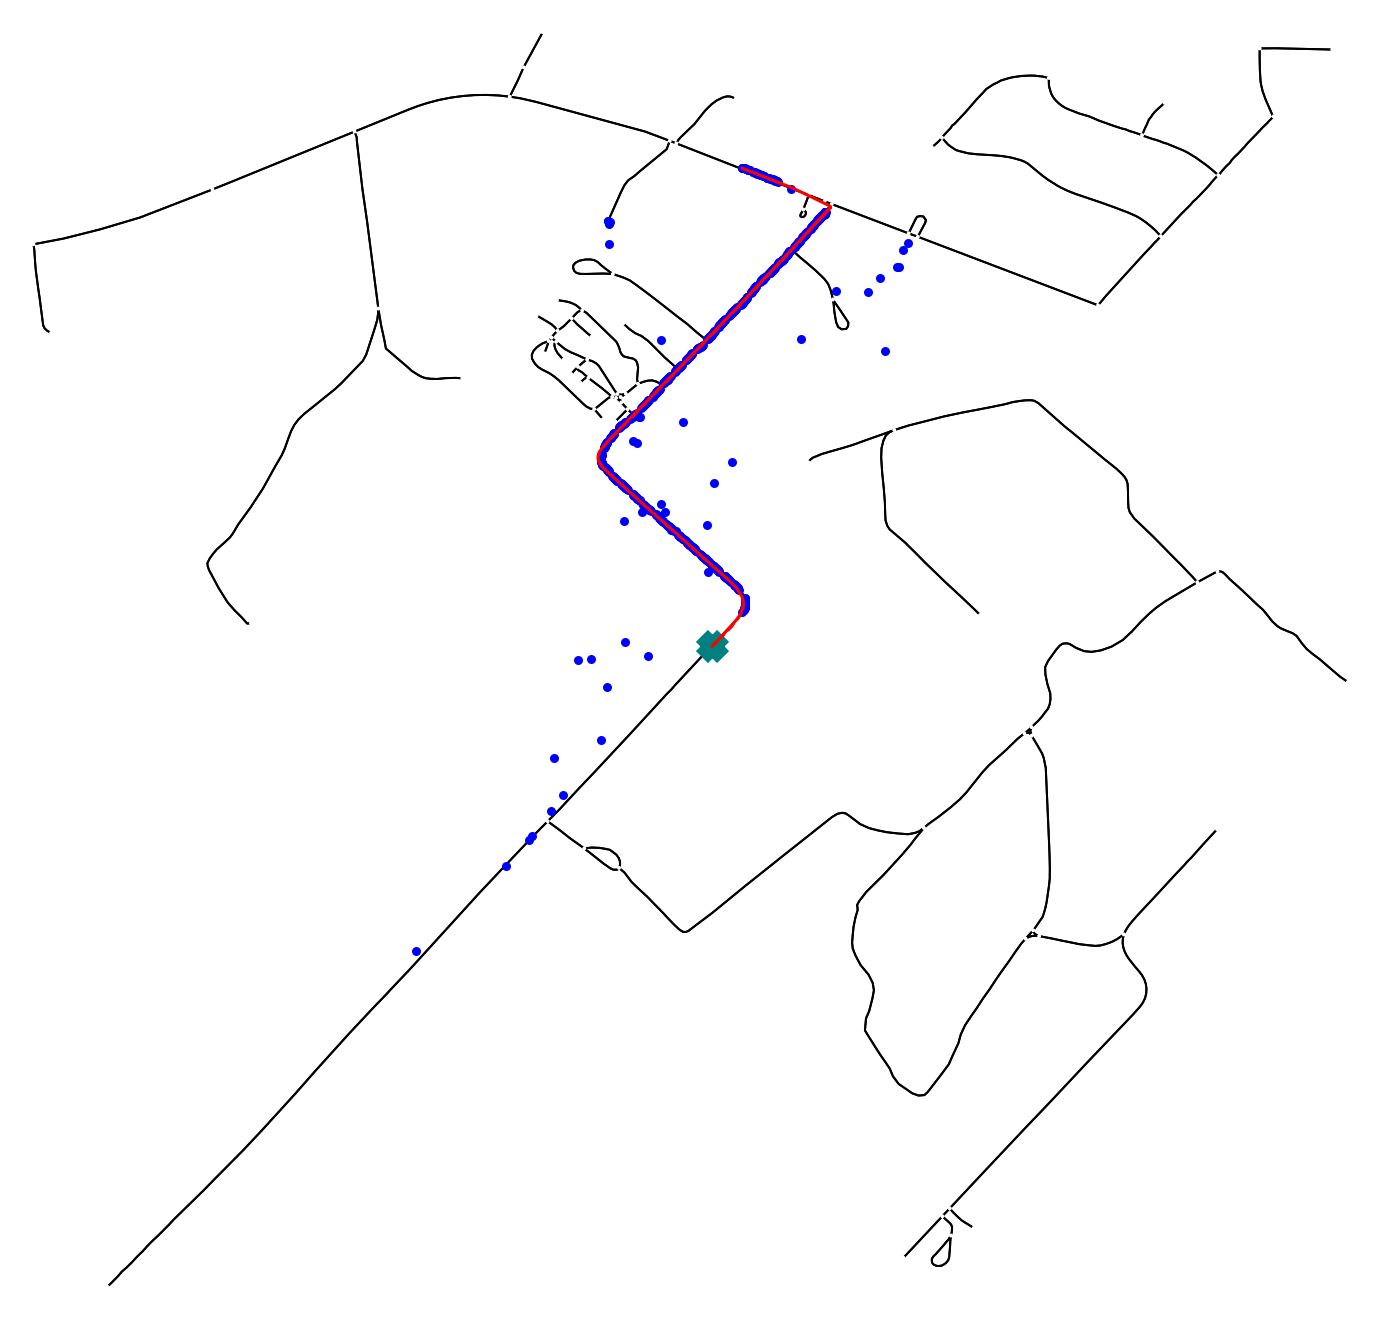

In [34]:
g = ox.graph_from_point((30.690984,-96.46288 ),dist=1500,dist_type="bbox")
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|road|road_link|service|service_link|unclassified|unclassified_link"]'
# t = {"highway": True,"building":True,"landuse":True}
# gdf = ox.geometries_from_point((30.690984,-96.46288 ),dist=1200,tags=t)
# g=ox.graph_from_place('Modena, Italy')
g = ox.project_graph(g)
# gdf= ox.projection.project_gdf(gdf)
# fig,ax = ox.plot.plot_footprints(gdf,color="white")
# g = ox.graph_from_point((743024.69,3398103.49),dist=1000)
fig,ax=ox.plot.plot_graph(g,bgcolor='white',figsize=(40,24),edge_color='black',edge_linewidth=2,show=False, close=False)
ax.plot(df_local.gps_e,df_local.gps_n,c='red',marker='.',markersize=2)
ax.scatter(df_local.pf_e,df_local.pf_n,c='blue',marker='.',linewidths=3)
ax.scatter(df_local.gps_e[0],df_local.gps_n[0],c='teal',marker='x',linewidths=30)
plt.show()
fig.savefig('global_loc.png',dpi=300)

In [24]:
df_local = pd.read_csv('local_logs_with_error.csv')
df_local.dropna(inplace=True)
df_local.head()

,Unnamed: 0,gps_e,gps_n,pf_e,pf_n,pf_theta,diff_e,diff_n,diff_sum,error
0,0,743073.622550,3.398155e+06,743063.838125,3.398141e+06,0.935102,95.734961,198.956189,294.691151,17.166571
2,2,743097.596624,3.398181e+06,743087.982511,3.398171e+06,0.700880,92.431155,96.745343,189.176498,13.754145
7,7,743016.348924,3.398382e+06,743025.520368,3.398381e+06,2.418263,84.115375,1.074242,85.189618,9.229822
8,8,743003.830461,3.398393e+06,743013.310787,3.398391e+06,2.431548,89.876584,3.114407,92.990991,9.643184
10,10,742978.786925,3.398415e+06,742988.795980,3.398412e+06,2.435795,100.181175,8.195634,108.376809,10.410418


<AxesSubplot:>

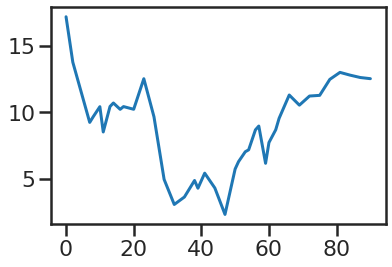

In [25]:
df_local.error.plot()

<AxesSubplot:>

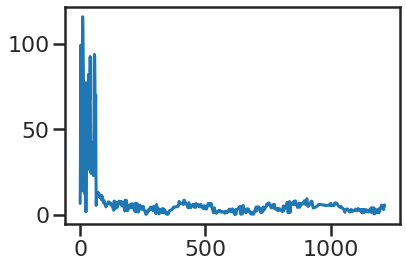

In [38]:
df_local = pd.read_csv('high_freq_local_callogs_with_error.csv')
df_local.dropna(inplace=True)
df_local.error.plot()

In [27]:
df_local.error.size

868

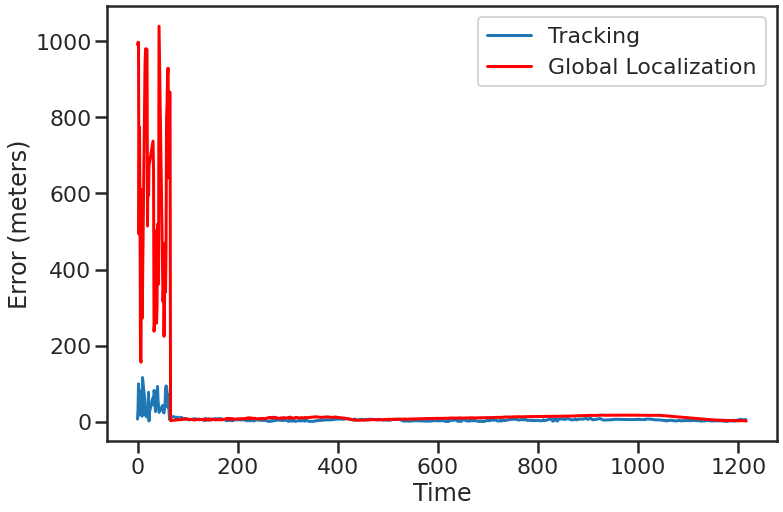

In [61]:
import seaborn as sns
plt.figure(figsize=(12,8))
# sns.set_theme(
sns.set_style('ticks')
sns.set_context("poster")
# sns.axes_style('whitegrid')
sns.lineplot(data=df_local.error)
sns.lineplot(data=df_global.error[:],color='red')
plt.legend(labels=["Tracking","Global Localization"])
# plt.show()

hfont = {'fontname':'Comic Sans MS'}
plt.xlabel('Time',**hfont)

plt.ylabel('Error (meters)',**hfont)
plt.savefig('local_error.png',dpi=300)

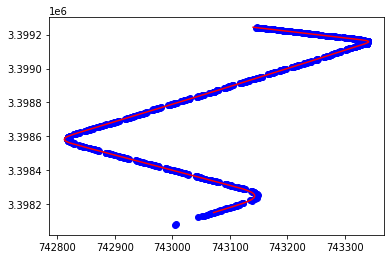

In [ ]:
plt.plot(df_local.gps_e,df_local.gps_n,c='red')
plt.scatter(df_local.pf_e,df_local.pf_n,c='blue')


In [ ]:
df_local.error[100:].mean()

4.009070741491992

In [29]:
import osmnx as ox

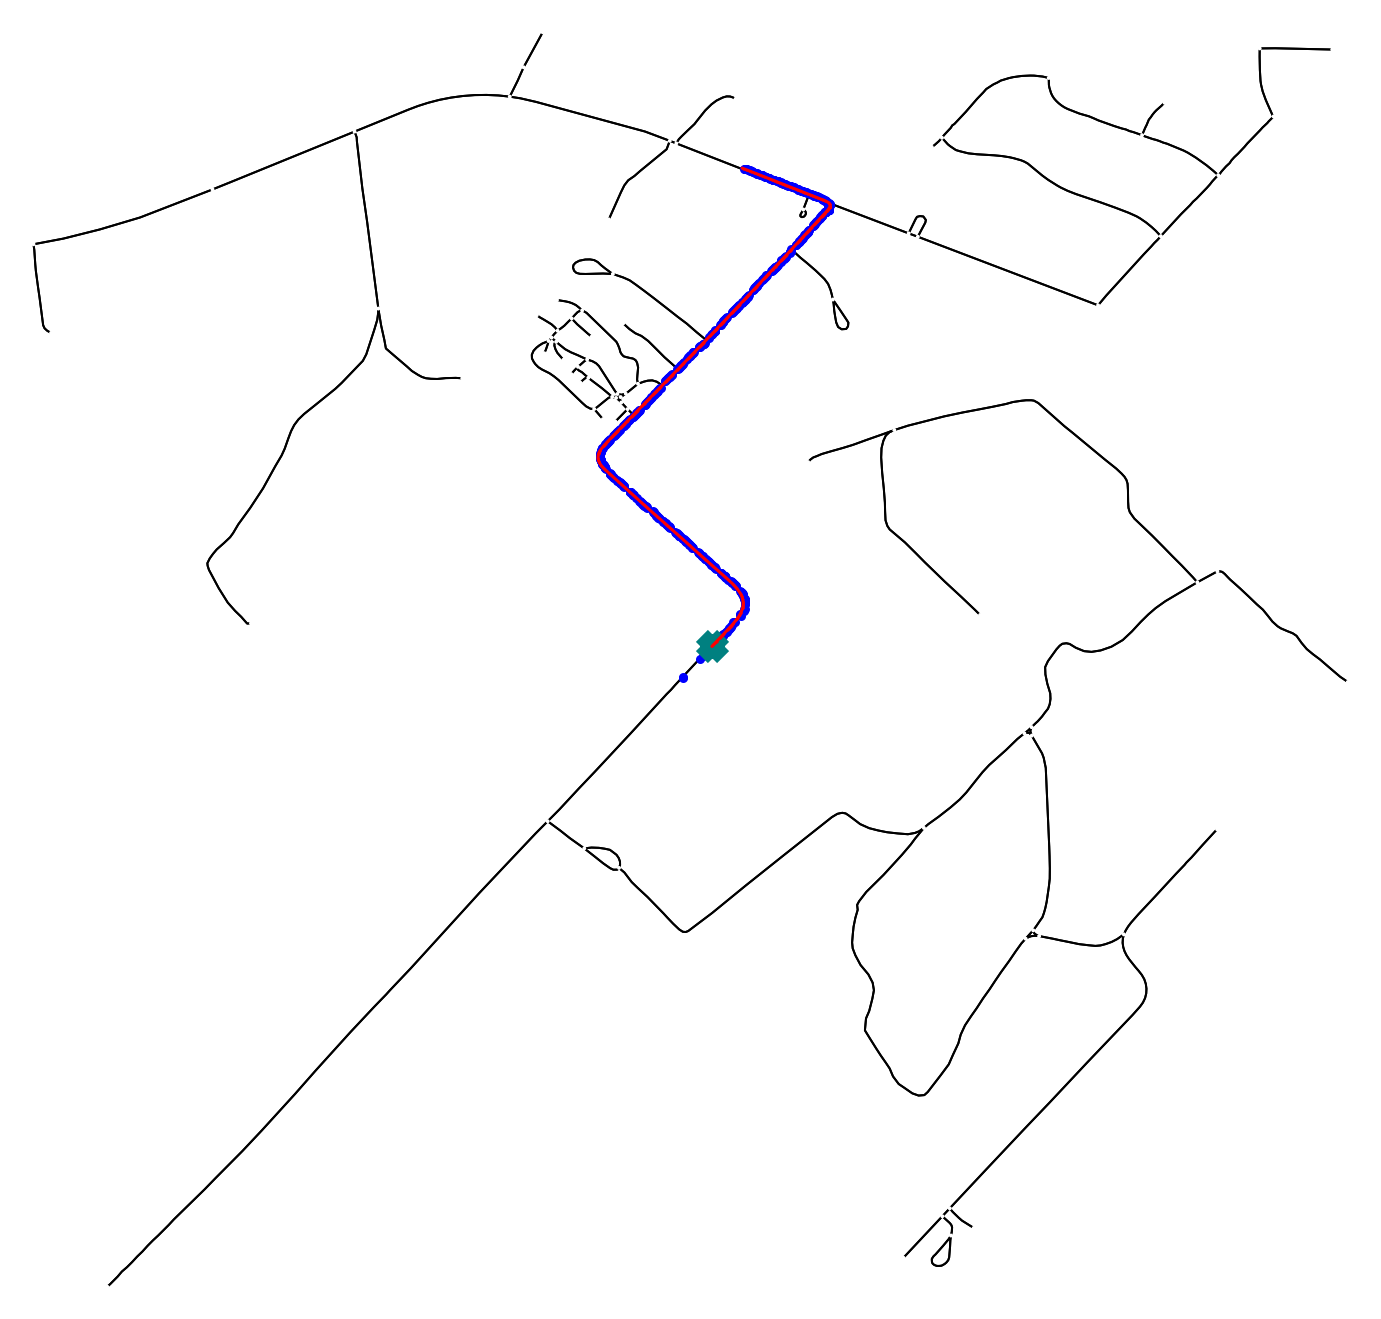

In [30]:
g = ox.graph_from_point((30.690984,-96.46288 ),dist=1500,dist_type="bbox")
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|road|road_link|service|service_link|unclassified|unclassified_link"]'
# t = {"highway": True,"building":True,"landuse":True}
# gdf = ox.geometries_from_point((30.690984,-96.46288 ),dist=1200,tags=t)
# g=ox.graph_from_place('Modena, Italy')
g = ox.project_graph(g)
# gdf= ox.projection.project_gdf(gdf)
# fig,ax = ox.plot.plot_footprints(gdf,color="white")
# g = ox.graph_from_point((743024.69,3398103.49),dist=1000)
fig,ax=ox.plot.plot_graph(g,bgcolor='white',figsize=(40,24),edge_color='black',edge_linewidth=2,show=False, close=False)
ax.plot(df_local.gps_e,df_local.gps_n,c='red',marker='.',markersize=2)
ax.scatter(df_local.pf_e,df_local.pf_n,c='blue',marker='.',linewidths=3)
ax.scatter(df_local.gps_e[0],df_local.gps_n[0],c='teal',marker='x',linewidths=30)
plt.show()
# plt.savefig('local_loc.png',format='png')
fig.savefig('local_loc.png',dpi=300)

In [ ]:
gdfs = ox.utils_graph.graph_to_gdfs(g)
gdfs.head()

NameError: name 'ox' is not defined

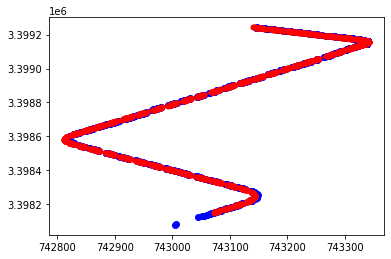

In [ ]:
plt.plot(df_local.gps_e,df_local.gps_n,c='red',marker='.',markersize=10)
plt.scatter(df_local.pf_e,df_local.pf_n,c='blue')
